In [19]:
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

IN_COLAB = 'google.colab' in sys.modules
warnings.filterwarnings("ignore", category=UserWarning)

if IN_COLAB:
  df = pd.read_csv('https://raw.githubusercontent.com/chakraskun/churn-modelling/main/Churn_Modelling.csv')
else:
  df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1847,1848,15758845,Rocher,590,Spain,Female,37,0,64345.21,1,0,1,61759.33,1
6195,6196,15804950,Onyemauchechukwu,514,France,Female,41,7,0.00,2,1,1,3756.65,0
6377,6378,15588904,Balashova,692,France,Male,33,9,0.00,1,1,0,113505.93,1
102,103,15580146,Hung,738,France,Male,31,9,82674.15,1,1,0,41970.72,0
2231,2232,15795954,Ndukaku,746,France,Male,35,2,172274.01,1,1,0,22374.97,0


In [3]:
numerical = [
  'CreditScore',
  'Age',
  'Balance',
  'EstimatedSalary',
  'Tenure',
  'NumOfProducts',
]
categorical = [
  'Geography',
  'Gender',
  'HasCrCard',
  'IsActiveMember',
]

# Data Preprocessing

- Dari hasil EDA didapat bahwa tidak ada value yang null
- drop CustomerId, Surname dan RowNumber
- tidak ada duplikat

In [4]:
df.duplicated().sum()

0

In [5]:
try:
  df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
except:
  pass

df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7485,561,France,Male,32,5,0.00,2,1,0,84871.99,0
3947,682,France,Male,61,10,73688.20,1,1,1,172141.33,0
6398,593,Spain,Male,26,9,76226.90,1,1,0,167564.82,0
1084,796,France,Male,24,8,0.00,2,1,0,61349.37,0
1824,798,France,Female,37,4,111723.08,1,1,1,83478.12,0


# Outliers Handling

Outlier untuk sementara tidak dihandle, dikarenakan outlier bersifat statistikal saja,

# Transformation

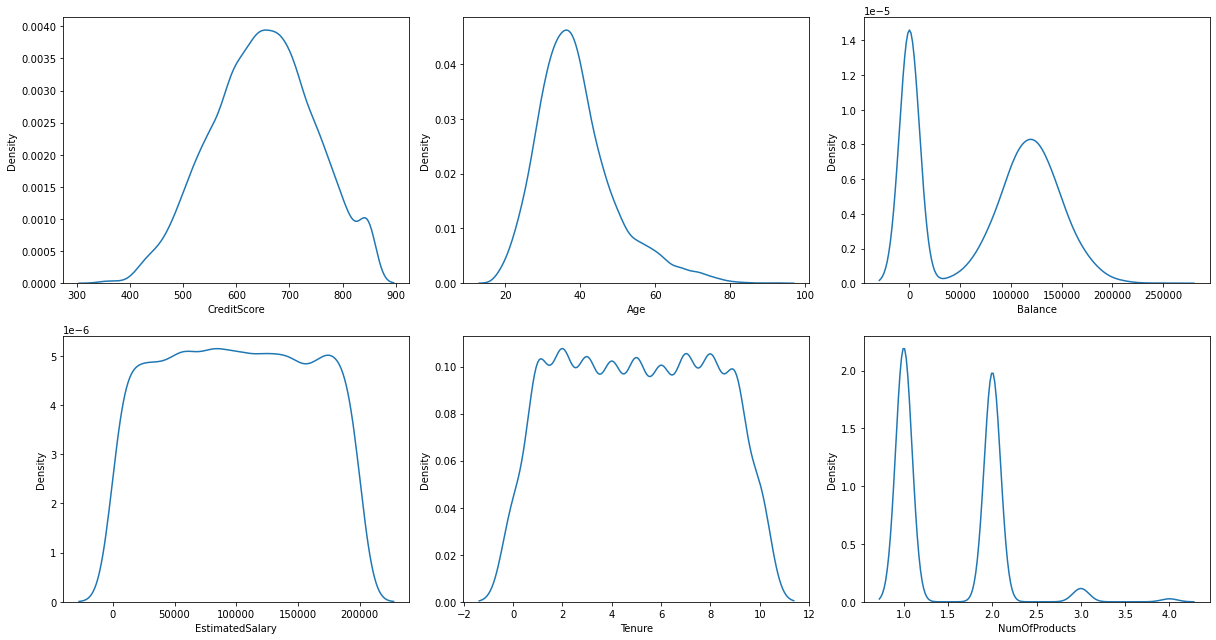

In [6]:
plt.figure(figsize=(17, 9))
for i in range(0, len(numerical)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[numerical[i]])
    plt.tight_layout()

## Handle Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

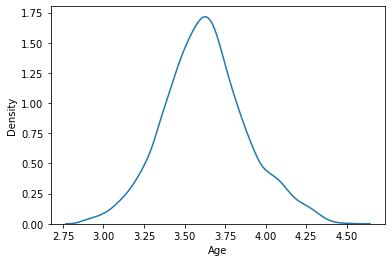

In [7]:
sns.kdeplot(np.log(df['Age']))

In [8]:
df['LogAge'] = np.log(df['Age'])

In [9]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge
2965,499,Germany,Male,36,5,131142.53,2,1,0,174918.46,0,3.583519
812,516,Spain,Female,33,3,0.00,2,1,1,58685.59,0,3.496508
3877,645,Spain,Male,45,4,0.00,1,0,1,174916.85,1,3.806662
4423,785,France,Female,40,3,0.00,2,1,1,96832.82,0,3.688879
4198,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1,3.555348


## Handle Balance, EstimatedSalary, Tenure, NumOfProducts

In [10]:
df['BalanceStd'] = StandardScaler().fit_transform(df['Balance'].values.reshape(len(df), 1))
df['EstimatedSalaryStd'] = StandardScaler().fit_transform(df['EstimatedSalary'].values.reshape(len(df), 1))
df['TenureStd'] = StandardScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['NumOfProductsStd'] = StandardScaler().fit_transform(df['NumOfProducts'].values.reshape(len(df), 1))

# Feature Encoding

In [11]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df['Gender'] = df['Gender'].map(mapping_gender)

In [12]:
try:
  one_hot_encoding = pd.get_dummies(df['Geography'], prefix='geo')
  df = df.join(one_hot_encoding)
except:
  pass

In [13]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogAge,BalanceStd,EstimatedSalaryStd,TenureStd,NumOfProductsStd,geo_France,geo_Germany,geo_Spain
6684,562,France,0,57,3,0.00,3,1,0,6554.97,1,4.043051,-1.225848,-1.626485,-0.695982,2.527057,1,0,0
1221,791,France,1,37,2,163789.49,2,1,0,75832.53,0,3.610918,1.399224,-0.421817,-1.041760,0.807737,1,0,0
7030,574,France,1,33,8,100267.03,1,1,0,103006.27,0,3.496508,0.381143,0.050707,1.032908,-0.911583,1,0,0
4422,648,Germany,0,28,8,90371.09,1,1,1,146851.73,0,3.332205,0.222540,0.813136,1.032908,-0.911583,0,1,0
7090,601,France,1,47,1,64430.06,2,0,1,96517.97,0,3.850148,-0.193220,-0.062118,-1.387538,0.807737,1,0,0


# Drop Unused Columns

In [14]:
df = df.drop(columns=['Geography','Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts'])

In [15]:
df.sample(5)

,CreditScore,Gender,HasCrCard,IsActiveMember,Exited,LogAge,BalanceStd,EstimatedSalaryStd,TenureStd,NumOfProductsStd,geo_France,geo_Germany,geo_Spain
4292,706,0,1,0,1,3.828641,0.820180,0.870608,-1.041760,0.807737,0,0,1
8939,772,1,1,0,0,3.526361,-1.225848,1.232717,1.378686,0.807737,1,0,0
1893,488,1,1,1,0,3.526361,-1.225848,0.450186,-0.695982,0.807737,1,0,0
3967,602,1,1,1,0,3.465736,-1.225848,0.277575,1.724464,0.807737,1,0,0
7740,665,0,1,1,1,3.931826,-1.225848,-1.063542,1.032908,-0.911583,0,0,1


# Split Dataset to Train and Test

In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
try:
  df_test.drop(columns=['Exited'], inplace=True)
except:
  print(df_test.columns)

# Handle imbalance class on train df

In [27]:
X = df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col != 'Exited']]
y = df_train['Exited'].values
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())
X_over_SMOTE.sample(5)

SMOTE
0    6356
1    3178
dtype: int64


/home/chakras/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


,CreditScore,Gender,HasCrCard,IsActiveMember,LogAge,BalanceStd,EstimatedSalaryStd,TenureStd,NumOfProductsStd,geo_France,geo_Germany,geo_Spain
7348,850,0,1,1,3.465736,-1.225848,-1.673859,-0.004426,-0.911583,0,0,1
7413,725,1,0,1,3.610918,0.767097,1.337112,0.341352,0.807737,1,0,0
7700,490,0,1,0,3.871201,1.264974,1.527294,1.032908,-0.911583,0,0,1
7901,775,1,0,0,3.871201,1.629300,-0.868091,-0.350204,0.807737,0,0,1
6278,605,0,1,1,3.465736,-1.225848,-1.007779,-0.004426,0.807737,1,0,0
